In [3]:
import pandas as pd
import numpy as np
import glob

In [4]:
# MIN_LONG = 113.668831
# MAX_LONG = 115.349968
# MIN_LAT = 22.470467
# MAX_LAT = 26.869833
MIN_LONG = 113.660000
MAX_LONG = 115.350000
MIN_LAT = 22.470000
MAX_LAT = 26.870000
GRID_SIZE = [0.01,0.01]
MAX_X = 168
MAX_Y = 440
(MAX_LONG - MIN_LONG)//GRID_SIZE[0], (MAX_LAT - MIN_LAT)//GRID_SIZE[1]

(168.0, 440.0)

In [118]:
DF = []
index = 0
for label in range(5):
    path = 'data/All/' + str(label)+'/*.csv'
    files = glob.glob(path)
    Df = []
    for filename in files:   
        index += 1
        if (index % 50 == 0):
            print(index, filename)
        df = pd.read_csv(filename, index_col=None, header=0)
        Df.append(df)
    DF.append(Df)

50 data/All/0\2016_08_19.csv
100 data/All/0\2016_10_08.csv
150 data/All/0\2016_11_27.csv
200 data/All/1\2016_07_22.csv
250 data/All/1\2016_09_10.csv
300 data/All/1\2016_10_30.csv
350 data/All/1\2016_12_20.csv
400 data/All/2\2016_08_13.csv
450 data/All/2\2016_10_02.csv
500 data/All/2\2016_11_21.csv
550 data/All/3\2016_07_16.csv
600 data/All/3\2016_09_04.csv
650 data/All/3\2016_10_24.csv
700 data/All/3\2016_12_13.csv
750 data/All/4\2016_08_07.csv
800 data/All/4\2016_09_26.csv
850 data/All/4\2016_11_15.csv


In [130]:
len(DF), len(DF[0])

(5, 178)

In [8]:
def getX(long):
    if long > MAX_LONG or long < MIN_LONG:
        return -1
    return int ((long - MIN_LONG)//GRID_SIZE[0])
def getY(lat):
    if lat > MAX_LAT or lat < MIN_LAT:
        return -1
    return int ((lat - MIN_LAT)//GRID_SIZE[1])
def getGridNumber(X, Y): 
    return Y*MAX_X + X

In [138]:
def process_data(df):
    d = []
    bad = [0,0]
    for i in df.values:
        x = getX(i[0])
        y = getY(i[1])
        status = int(i[-1])
        if x == -1 or y == -1:
            if x == -1:
                bad[0] += 1
            if y == -1:
                bad[1] += 1
            continue
        d.append([x, y, getGridNumber(x,y), status])
    D = pd.DataFrame(d, columns = ['X','Y', 'No.', 'Status'])
    return D, bad

In [160]:
STATUS = [] ##[X_max, X_min, y_min, y_max]
BAD = []
index = 0
D_list = []
for label in range(5):
    tmp_D = []
    tmp_bad = []
    tmp_status = []
    for j in range(len(DF[0])):
        index += 1
        if (index % 50 == 0):
            print(index, label, j)
        df = DF[label][j]
        D, bad = process_data(df)
        tmp_D.append(D)
        tmp_status.append([D['X'].min(), D['X'].max(), D['Y'].min(), D['Y'].max()])
        tmp_bad.append(bad)
    D_list.append(tmp_D)
    tmp_status = pd.DataFrame(tmp_status, columns = ['X_Min,','x_MAX','Y_Min','Y_MAX'])
    STATUS.append(tmp_status)
    tmp_bad = pd.DataFrame(tmp_bad, columns = ['bad_x','bad_y'])
    BAD.append(tmp_bad)

50 0 49
100 0 99
150 0 149
200 1 21
250 1 71
300 1 121
350 1 171
400 2 43
450 2 93
500 2 143
550 3 15
600 3 65
650 3 115
700 3 165
750 4 37
800 4 87
850 4 137


In [168]:
## BAD
for i in range(5):
    print(BAD[i].sum())

bad_x    0
bad_y    0
dtype: int64
bad_x    0
bad_y    0
dtype: int64
bad_x    0
bad_y    0
dtype: int64
bad_x    210
bad_y      0
dtype: int64
bad_x    7
bad_y    7
dtype: int64


In [169]:
## Status
for i in range(5):
    print(STATUS[i].describe())

           X_Min,       x_MAX       Y_Min       Y_MAX
count  178.000000  178.000000  178.000000  178.000000
mean    21.842697   50.589888    3.056180   17.483146
std      7.144037    4.795868    1.425035    4.487553
min     13.000000   40.000000    0.000000    8.000000
25%     14.000000   47.000000    2.000000   15.000000
50%     22.000000   49.000000    4.000000   16.000000
75%     26.000000   52.000000    4.000000   19.000000
max     42.000000   66.000000    7.000000   31.000000
           X_Min,       x_MAX       Y_Min       Y_MAX
count  178.000000  178.000000  178.000000  178.000000
mean    20.297753   50.252809    2.730337   16.921348
std      5.927633    4.800908    1.512763    3.856830
min     10.000000   40.000000    0.000000    6.000000
25%     14.000000   47.000000    1.000000   15.000000
50%     22.000000   49.000000    3.000000   16.000000
75%     24.000000   51.000000    4.000000   19.000000
max     42.000000   69.000000    7.000000   29.000000
           X_Min,       x_MA

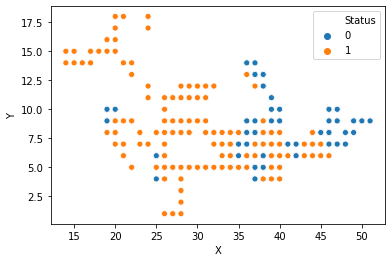

In [201]:
import matplotlib as plt
import seaborn as sns
ax = sns.scatterplot(x="X", y="Y", hue="Status", data=D_list[0][0])

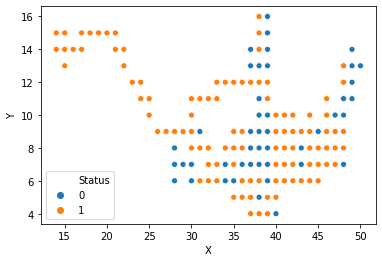

In [202]:
ax = sns.scatterplot(x="X", y="Y", hue="Status", data=D_list[0][1])

## Explore driver No.0

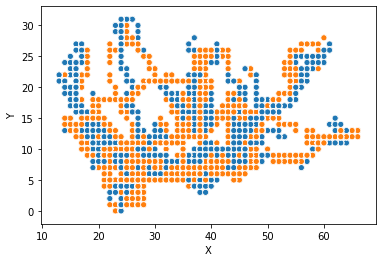

In [185]:
for i in D_list[0]:
    ax = sns.scatterplot(x="X", y="Y", hue="Status", data=i)

## Explore driver No.1

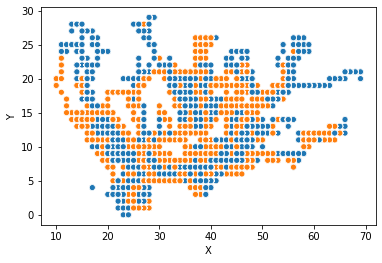

In [196]:
a = D_list[1][0]
for i in D_list[1]:
    a = pd.concat([a, i], ignore_index=True)
sns.scatterplot(x="X", y="Y", hue="Status", data=a, legend = False)

## Explore driver No.2

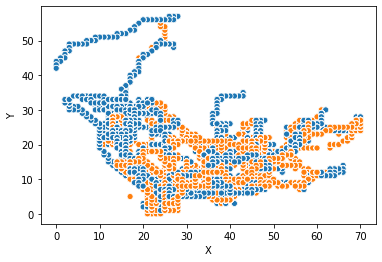

In [198]:
label = 2
b = D_list[label][0]
for i in D_list[label]:
    b = pd.concat([b, i], ignore_index=True)
sns.scatterplot(x="X", y="Y", hue="Status", data=b, legend = False)

# Expore driver #3

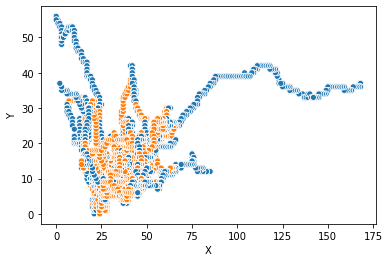

In [199]:
label = 3
b = D_list[label][0]
for i in D_list[label]:
    b = pd.concat([b, i], ignore_index=True)
sns.scatterplot(x="X", y="Y", hue="Status", data=b, legend = False)

In [230]:
index = 0
for i in D_list[3]:
    s = i.describe()
    if s['X']['max'] > 80 or s['Y']['max'] > 40:
        print(index)
    index += 1

36
73
147
149


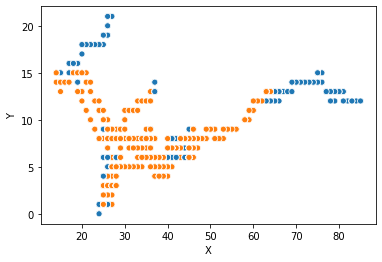

In [242]:
ax = sns.scatterplot(x="X", y="Y", hue="Status", data=D_list[3][149], legend = False)

## Explore driver #4

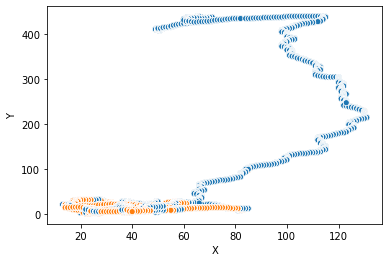

In [200]:
label = 4
b = D_list[label][0]
for i in D_list[label]:
    b = pd.concat([b, i], ignore_index=True)
sns.scatterplot(x="X", y="Y", hue="Status", data=b, legend = False)

In [227]:
index = 0
for i in D_list[4]:
    s = i.describe()
    if s['X']['max'] > 80 or s['Y']['max'] > 40:
        print(index)
    index += 1

33
41
79
80
81
82
83
84
85
132


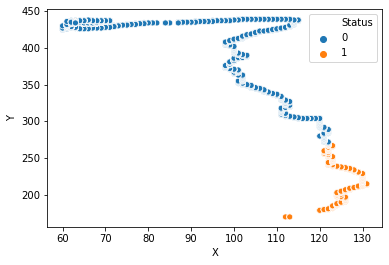

In [279]:
ax = sns.scatterplot(x="X", y="Y", hue="Status", data=D_list[4][80])

# Filter the data

In [287]:
VALID_X = 85
VALID_Y = 50
def fillter(df):
    XIndex = df[ df['X'] > VALID_X ].index
    YIndex = df[ df['Y'] > VALID_Y ].index
    return XIndex.shape[0], YIndex.shape[0]

(910, 5326)

In [299]:
Bad_Num_List = []
index = 0 
for label in range(5):
    for j in range(len(D_list[0])):
        index += 1
#         if (index % 50 == 0):
#             print(index, label, j)
        bx, by = fillter(D_list[label][j])
        if bx > 0 or by >0:
            print(label, j, bx, by)
        Bad_Num_List.append([label, j, bx, by])

2 22 0 196
3 36 345 0
3 147 0 277
4 79 0 105
4 80 910 5326
4 81 0 5350
4 82 0 5343
4 83 0 5325
4 84 0 5360
4 85 1267 3966


# remove the out of ranged data, and recalculate the grid No. anve to csv

In [1]:
def process_data2(df):
    d = []
    for i in df.values:
        x = getX(i[0])
        y = getY(i[1])
        status = int(i[-1])
        if x == -1 or y == -1:
            continue        
        d.append([x, y, getGridNumber(x,y), status, i[5],i[6], i[7]])
    D = pd.DataFrame(d, columns = ['X','Y', 'No.', 'Status', 'Hour','Min', 'Second'])
    return D

In [9]:
index = 0
for label in range(5):
    pathIn = 'data/All/' + str(label)+'/*.csv'
    files = glob.glob(pathIn)
    for filename in files: 
        pathOut = 'data/Cleaned/' + str(label) + '/' + filename.split('\\')[-1]
        index += 1
        if (index % 50 == 0):
            print(index, filename, pathOut)
        df = pd.read_csv(filename, index_col=None, header=0)
        process_data2(df).to_csv(pathOut,index=False)

50 data/All/0\2016_08_20.csv data/Cleaned/0/2016_08_20.csv
100 data/All/0\2016_10_09.csv data/Cleaned/0/2016_10_09.csv
150 data/All/0\2016_11_28.csv data/Cleaned/0/2016_11_28.csv
200 data/All/1\2016_07_24.csv data/Cleaned/1/2016_07_24.csv
250 data/All/1\2016_09_12.csv data/Cleaned/1/2016_09_12.csv
300 data/All/1\2016_11_01.csv data/Cleaned/1/2016_11_01.csv
350 data/All/1\2016_12_22.csv data/Cleaned/1/2016_12_22.csv
400 data/All/2\2016_08_16.csv data/Cleaned/2/2016_08_16.csv
450 data/All/2\2016_10_05.csv data/Cleaned/2/2016_10_05.csv
500 data/All/2\2016_11_24.csv data/Cleaned/2/2016_11_24.csv
550 data/All/3\2016_07_20.csv data/Cleaned/3/2016_07_20.csv
600 data/All/3\2016_09_08.csv data/Cleaned/3/2016_09_08.csv
650 data/All/3\2016_10_28.csv data/Cleaned/3/2016_10_28.csv
700 data/All/3\2016_12_18.csv data/Cleaned/3/2016_12_18.csv
750 data/All/4\2016_08_12.csv data/Cleaned/4/2016_08_12.csv
800 data/All/4\2016_10_01.csv data/Cleaned/4/2016_10_01.csv
850 data/All/4\2016_11_20.csv data/Cleane